# Depth First Search – Using DFS to solve nxn edge matching grid puzzle

## Edge Matching Puzzle
The puzzle can be found in many different nxn grid sizes and many different ways, but the underlying problem is always the same: **given $m^2$ tiles, find  an $m$x$m$ grid such that for each tile $tile_{i,j}$, its edges match the edges of its neighboring tile (i.e. the bottom edge of $tile_{i-1,j}$ matches the top edge of $tile_{i,j}$.**

For our example, we will look at *Professor McBrainy's Zany out of this WORLD puzzle*. This puzzle consist of 16 tiles (so solving for a 4x4 grid), where each tile has a planetary symbol on each edge. There are 8 total planetary symbols to be represented on an edge, and there is no constraint about having duplicate symbols on the same tile.

In general for this problem, if we assume there are no symmetric cards, the number of ways we can lay down the tiles on the square grid is $n*n-1*n-2*...*1=n!$, where $n$ is the number of tiles and $\sqrt{n}\in\mathbb{N}$. Since each card is square, it can be rotated four times to give a new possible laydown, giving $(4*n)*(4*(n-1))*...*4=n!*4^n$ total possibilities. Finally, since the $m$x$m$ grid ($m=\sqrt{n}$)can be rotated 4 times in its final state, we divivde by four to get unique solutions, giving us $n!*4^{n-1}$ possible ways to layout the grid.

In the context of our chosen puzzle, this is $16!*4^{15}\approx2.24*10^{22}$ possible grids. For now we assume one of those grids is correct. We can see very clearly that to solve this type of problem in a bruteforce manner will result in computation times well beyond feasibility. We must implement an algorithm that will achieve a time complexity that won't take years to solve.

## DFS
**Depth First Search (DFS)** is a basic algorithm that can be best described in the traversal of a binary tree. Specifically, we will consider the *pre-order* traversal of a binary tree. Pre-order traversal can be defined as follows: *If we start at a node in a binary tree, pre-order travel has that we "visit" the current node first, then the left subtree, then the right subtree.* 

Lets consider the following tree:

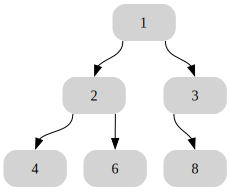

In [1]:
from binarytree import Node, tree
from IPython.display import Image, display

root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(6)
root.right.left = Node(8)

graph = root.graphviz()
display(graph)

In the tree above, if we were to perform tree order travel and append our visited nodes to a list in order of visitation, we would get `[1, 2, 4, 6, 3, 8]`. We can implement this in code with a recursive function calling scheme like so:
```python
def pre_order_traversal(root: Node) -> None:
    if root is not None:
        print(root.val)
        pre_order_traversal(root.left)
        pre_order_traversal(root.right)
```
The above code has $O(N)$ time complexity for $N=\#\ nodes$, since we visit every single node in the tree.

We can define DFS in a similar manner. Say we want to find a target value $val$ in a binary tree. We could use the following code to achieve this with $O(N)$ time complexity:
```python
def dfs(root: Node) -> None:
    if root is None:
        return
    
    if root.val = val:
        return root
    left = dfs(root.left)
    if left is not None:
        return left
    
    return dfs(root.right)
```
Here we introduce **backtracking** and **divide and conquer** – when we find leaf node and no solution, we backtrack and search the right subtree, and we do this for both the left and the right subtree of the root to divide and conquer the search. We are still achieving $O(N)$, where now we refer to $O(N)$ as linear time complexity.

## Backtracking and Pruning
The concept of backtracking is particularly useful in combinatorial problems, which is what we are working with here. If we think of our laying our tiles out on our $m$x$m$ grid as nodes, with the edges of the tree being related to the symbols on edges of the tile, we can create a *search space tree*, which will have all combinations possible in it. This means we could in theory apply some form of DFS onto this tree and find the solution to the edge matching problem.

Looking at our search space tree though, from the math above we see that traversing every possible branch in the tree is just not feasible. This is where we can leverage **pruning** to back out of trees that do not yield a solution. As we explore the search-space, we are constructing our search-space tree as we go, hoping that we travel down a path that leads to the solution. If we place the third tile down, and find that no card is able to satisfy the edge matching condition for the fourth card, then rather than constructing the tree all the way to the 4x4 solution (in our *out of this WORLD* puzzle space), we declare the subtrees incorrect and prune them from our solution space. This allows us to reduce computation time by systematically exiting subtrees that will not lead to a solution (because an early branch cannot meet the requirements).

## Solving the Puzzle Using DFS with Pruning
Now we will look to implement an agorithm to search for our solution. We will start with a simpler 4 tile, 2x2 grid solution to show the functionality of the code, then we will solve the good Professor McBrainy's puzzle.

### Logic at a Given Node
Say we have placed $n$ tiles down such that we now are looking to see which tiles could be a potential fit at the grid point $(i,j)$. For each tile $k$ in the set of unused tiles, we need to see if it is valid compared to the card immidiately left of it and immediately above it ($tile_{i,j-1}\ and\ tile_{i-1,j}$). What this really means is that we need to ensure that: 
1) The right edge of $tile_{i,j-1}$ matches the left edge of $tile_{i,j}$
    - If there is no tile to the left of $tile_{i,j}$ then condition (1) is automatically met
2) The bottom edge of $tile_{i-1,j}$ matches the top edge of $tile_{i,j}$
    - If there is no tile above $tile_{i,j}$ then condition (2) is automatically met
If both conditions are met then we place the tile at position $(i,j)$ and we start searching the subtrees of that card. Once we fill the grid, we back all the way out and return a list containing the tile laydown in a 4x4 grid.
If either condition is not met, we can: a) rotate the current tile if it already has not been rotated to the other three positions, or b) if we have alraedy searched the rotation space of the current tile, prune that card and its subtree of possible tile placements from our search space tree and move onto the next unplaced card.
Now, if we can't find any card that meets the neighbor requirement, we then backtrack to our previous placement and search through the remaining cards we did not check for that position. This recurively continues. The beauty here is that rather than exploring each cards subtree hoping we find the solution, we apply our constraints and eliminate subtrees when we find a tile cannot be placed. This greatly reduces the number of nodes we traverse down, leading to better time performance.

### Encoding the Cards
In the intro we mentioned that the symbols in the *out of this WORLD* are planets. How do we pass the available cards into our code? We will encode each tile in a list of length 4, where the entries are the left, top, right, and bottom symbol, in that order. Each list is embedded in a list of lists, which we will feed into our function. We encode each symbol as follows:
$$
Earth\rightarrow 1
$$
$$
Moon\rightarrow 2
$$
$$
Mars\rightarrow 3
$$
$$
Saturn\rightarrow 4
$$
$$
Orange Planet\rightarrow 5
$$
$$
Green Planet\rightarrow 6
$$
$$
Purple Planet\rightarrow 7
$$
$$
Rainbow Planet\rightarrow 8
$$
For example ```[3,4,8,1]``` is a tile that has a left edge symbol Mars, top edge symbol of Saturn, right edge symbol of Rainbow Planet, and a bottom edge of Earth.

### In Code
We will work with python to construct our algorithm. The full solver will be shown first, with the individual components beign defined as the solution is walked through.
```python
def solve_puzzle(input_cards: list[list[int]], grid_size: int) -> list[list[int]]:
    
    ans = [[None for _ in range(grid_size)] for _ in range(grid_size)]
    unused_tiles = {i: input_cards[i] for i in range(len(input_cards))}
    used_tiles = set()
    
    pos = 0 

    def dfs_for_grid(pos):
        
        if len(used_tiles) == grid_size**2:
            return True
        
        i = pos // grid_size
        j = pos % grid_size

        rot = 0
        card_idx = 0

        res = False

        for card_idx in list(unused_tiles.keys()):

            card = unused_tiles[card_idx]
            rot = 0

            left_neighbor = ans[i][j-1] if j > 0 else [None]
            top_neighbor = ans[i-1][j] if i > 0 else [None] 

            while rot < 4:
                
                if is_valid(potential_neighbor=card, left_neighbor=left_neighbor, top_neighbor=top_neighbor):
                    ans[i][j] = card
                    used_tiles.add(card_idx)
                    unused_tiles.pop(card_idx)
                    res = dfs_for_grid(pos+1)
                    if res:
                        return res 
                    else:
                        ans[i][j] = None
                        unused_tiles[card_idx] = rotate_card(card, 4-rot)
                        used_tiles.remove(card_idx)
                else:
                    card = rotate_card(card, 1)
                    rot += 1
        return res
    
    res = dfs_for_grid(pos)

    return ans

```


We define our solver ```solve_puzzle``` with the following inputs:
- ```input_cards``` is the list of tile encoding lists, in no particular order.
    - **NOTE** The order will affect how fast we converge on a solution, so we will have to randomize this multiple times and solve each perumtation to get a good idea of runtime.
- ```grid_size``` is the edge size of the final grid (```grid_size=4``` for a $4$x$4$ grid)

To track what cards we have placed and output the final solution, we initialze an $m$x$m$ array ```ans```, where each element is ```None```. We then take our input cards and encode them with an index in a dictionary ```unused_tiles```, so that we can track which cards we have not used yet without manipulating the ```input_cards``` input. We also define an empty set ```used_tiles```, where if we place a tile, we will store the index of that tile from the ```unused_tiles``` dictionary, so that we do not need to track the orientation we chose for a tile. Finally, we define ```pos``` is a input index tracker for the whole array, so we say $pos=\{\mathbb{N} | 0\leq pos \leq n\}$, where $n$ is the number of tiles. This always us to only track one index, and we will define the row and col indices within the DFS function. After defining our DFS with pruning function, we call ```dfs_for_grid``` with the initial index ```pos=0```, and return the found solution grid ```ans```.

Lets now look at our DFS function:
```python
def dfs_for_grid(pos):
        
    if len(used_tiles) == grid_size**2:
        return True

    i = pos // grid_size
    j = pos % grid_size

    res = False

    for card_idx in list(unused_tiles.keys()):

        card = unused_tiles[card_idx]
        rot = 0

        left_neighbor = ans[i][j-1] if j > 0 else [None]
        top_neighbor = ans[i-1][j] if i > 0 else [None] 

        while rot < 4:

            if is_valid(potential_neighbor=card, left_neighbor=left_neighbor, top_neighbor=top_neighbor):
                ans[i][j] = card
                used_tiles.add(card_idx)
                unused_tiles.pop(card_idx)
                res = dfs_for_grid(pos+1)
                if res:
                    return res 
                else:
                    ans[i][j] = None
                    unused_tiles[card_idx] = rotate_card(card, 4-rot)
                    used_tiles.remove(card_idx)
            else:
                card = rotate_card(card, 1)
                rot += 1
    return res
```

Our DFS function only takes in the current position we are considering for card placement, ```pos```. 

The first thing is **the most important part of the function: the base case**. If we find that we have filled the ```used_tile``` set with the square of the ```grid_size``` parameter, then we have found a solution, and we need not do anymore searching. We return ```True``` so that ew can propogate up through our recurive calling that we found the solution. 

If we have filled ```used_tiles```, then we continue to define which row ```i``` and which col ```j``` we are trying to fill. We initialize the result of our search to be ```res=False```, so that if we don't reach the base case, we know to prune the branch. We then iterate over all the unused tiles first initializing ```rot=0``` as a way for us to track the amount of times we've rotated the tile we are testing, and set ```card``` equal to the tile to test. We then exrtact the left and top neighbor of position $(i,j)$ from the answer array where we store the placed tiles in the grid positions. We set a neighbor to ```[None]``` if the neighbor doesn't exist (i.e. the tile position is on teh outer edge of the grid). 

We then check whether the test tile ```card``` is valid at $(i,j)$, by passing it through a helper function ```is_valid```. This function applies the logic we outlined at a given node, and is defined as followed:
```python
def is_valid(potential_neighbor: list[int], left_neighbor: list[int]=[None], top_neighbor: list[int]=[None]) -> bool:
    if left_neighbor[0] is None and top_neighbor[0] is None:
        return True
    elif left_neighbor[0] is None:
        return potential_neighbor[1] == top_neighbor[3]
    elif top_neighbor[0] is None:
        return potential_neighbor[0] == left_neighbor[2]
    else:
        return (potential_neighbor[0] == left_neighbor[2]) and (potential_neighbor[1] == top_neighbor[3])
```
The function takes three inputs ```potential_neighbor``` which is the tile we are testing, and ```left_neighbor``` and ```top_neighbor``` as the left and top neighboring tiles to the position we are trying to find an appropiate tile for. If no neighbors are present, then we pass ```True``` as this is the upper corner of the grid so it's always valid. If there is no left neighbor, we only check if the top neighbor's bottom edge matches the potential neighbor's top edge. If there is no top neighbor, we only check that the left neighbors right edge matches the potential neighbors left edge. If both neighboring tiles exist, we check that the top neighbor's bottom edge matches the potential neighbor's top edge **and** that the left neighbors right edge matches the potential neighbors left edge. If any of these are true, we return ```True```. Otherwise, ```False``` is returned and we know that tile is not a valid choice.

Going back to ```dfs_for_grid```, if ```is_valid``` returns true, we add the card to our answer grid at $i,j$, we add its encoded index to the ```used_tiles``` set, and we remove it from the ```unused_tiles``` dictionary. After this, we then call on ```dfs_for_grid``` with the input argument of ```pos+1```. This is a recursive call and allows for faster run times. We then check the output `res`: if `res=True`, we found the solution, so we return it to back out of our recursive calls. If `res=False`, then we remove the test tile from `ans`, add it back to `unused_tiles`, and remove the encoding index from `used_tiles`, and move on to testing the next possible tile.

Now – what if `is_valid` returned `False`? We rotate the possible tile `card` by $90^\circ$ clockwise, and indicate that we have rotated the card by calling `rot+=1`. We use the `rotate_card` helper function to carry out the "rotation" on the list, which is defined as follows:
```python
def rotate_card(card: list[int], n: int=1) -> list[int]:
    '''
    `rotate_card`: Given input card, where a card is defined a square with a symbol on each edge, encoded with a list with `int`
    values corresponding to each kind of symbol in left-top-right-bottom edge order, return the card rotated 90 degrees
    clockwise.

    Inputs
    ------
    `card : list[int]`
    - list of values mappable to defined symbols in order of left-top-right-bottom of square card
    
    `n : int`
    - number of times to rotate card clockwise. we take modulo with respect to n to ensure we don't
    repeat rotations
    Returns
    -------
    `card : list[int]`
    - input card rotated n times 90 degrees clockwise
    '''
    if n%4 == 0:
        return card
    for _ in range(n%4):
        card = card[-1:] + card[:-1]
    
    return card
```
It takes the current tile `card` as an input, and `n` where `n` is a integer representing how much we wish to rotate the tile by. We use `n%4` to aviod unnecessary compuation, since rotating a tile 5 times is the same as rotating it once.

Back to `dfs_for_grid`, we rotate the card and pass it back through the `is_valid` function. If after 3 rotations we do not get a valid placement, we move on to the next unused tile for testing.

## The 2x2 Case

Let's now try this on a known answer in a 2x2 case. Let us plot the solution:

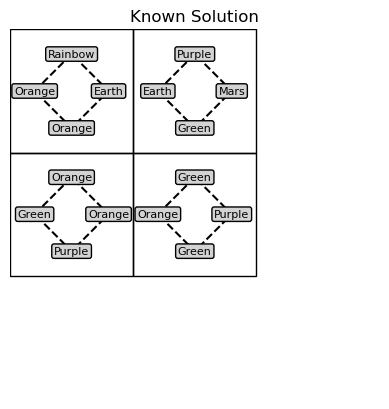

In [1]:
from utils.puzzleSolver import solve_puzzle
from utils.puzzleSolver import plot_solution
encoding_dict = {
    1: 'Earth',
    2: 'Moon',
    3: 'Mars',
    4: 'Saturn',
    5: 'Orange',
    6: 'Green',
    7: 'Purple',
    8: 'Rainbow'
}
solution = [[[5, 8, 1, 5], [1, 7, 3, 6]], [[6, 5, 5, 7], [5, 6, 7, 6]]]
plot_solution(solution, encoding_dict, title="Known Solution")

Now lets see if the solver produces the same answer. The code explained above lives in the `puzzleSolver.py` file under the `utils` folder in this repo, so we will import the necessary code in, define our input cards, and run it through the solver:

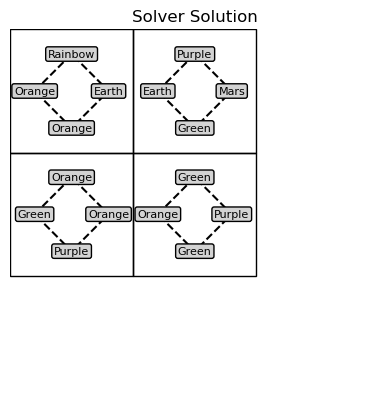

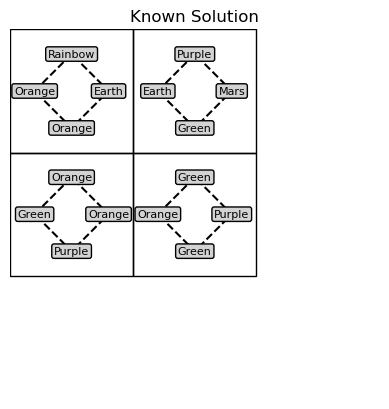

In [2]:
input_cards = [[5, 8, 1, 5], [6, 5, 5, 7], [5, 6, 7, 6], [1, 7, 3, 6]]
grid_size = 2

ans = solve_puzzle(input_cards, grid_size)
plot_solution(ans, encoding_dict, title="Solver Solution")
plot_solution(solution, encoding_dict, title="Known Solution")

We can see that the solutions appear to match. If we want absolute confirmation:

In [3]:
assert solution==ans

With no error appearing, we have that `solution==ans`!

## Professor McBrainy's Zany out of this WORLD 4x4

We will now use the code to solve and display the solution the algorithm finds:

In [ ]:
input_cards = [
    [4,4,2,1],
    [6,1,5,7],
    [6,7,6,8],
    [1,8,5,6],
    [5,7,7,6],
    [6,5,5,7],
    [5,8,1,5],
    [2,3,3,8],
    [3,5,6,7],
    [1,7,3,6],
    [5,6,7,6],
    [7,6,5,5],
    [5,6,7,6],
    [7,7,3,6],
    [3,4,6,7],
    [6,7,3,4]
]
grid_size = 4

ans = solve_puzzle(input_cards, grid_size)
plot_solution(ans, encoding_dict, title="Solver Solution")

In [2]:
def plot_solution(arr: list[list[int]], encoding_dict: dict, title: str=None) -> None:

    import matplotlib.pyplot as plt
    from matplotlib.patches import Rectangle
    
    rows = len(arr)
    cols = len(arr[0])

    fig, ax = plt.subplots()
    ax.set_aspect('equal')

    # --- Scale factor for diamond size ---
    scale = 0.6  # Smaller than 1 to reduce overlap

    # Plot each tile
    for i in range(rows):
        for j in range(cols):
            tile_data = arr[i][j]

            # Offset for tile center
            offset_x = j * 2
            offset_y = -i * 2

            # Draw tile boundary (optional)
            tile_box = Rectangle((offset_x - 1, offset_y - 1), 2, 2,
                                 linewidth=1.0, edgecolor='black', facecolor='none')
            ax.add_patch(tile_box)

            # Diamond vertex positions (scaled)
            diamond_vertices = [(scale * x, scale * y) for (x, y) in [(-1, 0), (0, 1), (1, 0), (0, -1)]]

            # Diamond outline
            diamond_path = diamond_vertices + [diamond_vertices[0]]
            diamond_x = [x + offset_x for x, y in diamond_path]
            diamond_y = [y + offset_y for x, y in diamond_path]
            ax.plot(diamond_x, diamond_y, 'k--')

            # Labels at vertices
            for k, (dx, dy) in enumerate(diamond_vertices):
                num = tile_data[k]
                label = encoding_dict.get(num, f"?{num}")
                ax.text(offset_x + dx, offset_y + dy, label,
                        ha='center', va='center', fontsize=8,  # Smaller font
                        bbox=dict(boxstyle="round,pad=0.2", edgecolor="black", facecolor="lightgray"))

            # Optional: dashed box around the diamond
            padding = scale * 1.2
            # box = Rectangle((offset_x - padding, offset_y - padding),
            #                 2 * padding, 2 * padding,
            #                 linewidth=1.0, edgecolor='blue', facecolor='none', linestyle='--')
            # ax.add_patch(box)

    # Adjust plot limits
    ax.set_xlim(-1, cols * 2 + 1)
    ax.set_ylim(-rows * 2 - 1, 1)
    ax.axis('off')
    if title is not None:
        plt.title(title)
    plt.show()